In [1]:
# Import relevant libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
# Load data.
book_data = pd.read_csv('book.csv', encoding='ISO-8859-1')
book_data.head(10)

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
5,6,276744,The Kitchen God's Wife,7
6,7,276745,What If?: The World's Foremost Military Histor...,10
7,8,276747,PLEADING GUILTY,9
8,9,276747,Under the Black Flag: The Romance and the Real...,9
9,10,276747,Where You'll Find Me: And Other Stories,8


In [6]:
book_data.columns

Index(['Unnamed: 0', 'User.ID', 'Book.Title', 'Book.Rating'], dtype='object')

In [7]:
# Rename the columns.
book_data = book_data.rename(columns={'User.ID':'userId', 'Book.Title':'bookTitle', 'Book.Rating':'bookRating' })

In [8]:
book_data.describe()

,Unnamed: 0,userId,bookRating
count,10000.00000,10000.000000,10000.00000
mean,5000.50000,95321.249800,7.56630
std,2886.89568,117645.703609,1.82152
min,1.00000,8.000000,1.00000
25%,2500.75000,2103.000000,7.00000
50%,5000.50000,3757.000000,8.00000
75%,7500.25000,162052.000000,9.00000
max,10000.00000,278854.000000,10.00000


In [9]:
book_data.isnull().any()

Unnamed: 0    False
userId        False
bookTitle     False
bookRating    False
dtype: bool

In [28]:
book_data.shape

(10000, 4)

In [33]:
book_data['bookTitle'].value_counts().unique

<bound method Series.unique of Fahrenheit 451                                                             5
The Subtle Knife (His Dark Materials, Book 2)                              4
The Amber Spyglass (His Dark Materials, Book 3)                            4
Charlie and the Chocolate Factory                                          4
Ender's Game (Ender Wiggins Saga (Paperback))                              4
                                                                          ..
The 176 Stupidest Things Ever Done                                         1
Inherit the Stars                                                          1
Graveyard Dust (Benjamin January (Paperback))                              1
The Last Best Hope of Earth: Abraham Lincoln and the Promise of America    1
Lightning                                                                  1
Name: bookTitle, Length: 9659, dtype: int64>

In [10]:
#Data Cleaning.
book_cleaned = book_data.drop(book_data.columns[0], axis=1)
book_cleaned.head()

,userId,bookTitle,bookRating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


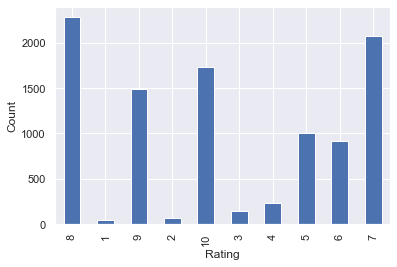

In [30]:
plt.rc("font", size=15)
book_data['bookRating'].value_counts(sort=False).plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [12]:
rating = pd.DataFrame(book_cleaned.groupby('bookTitle')['bookRating'].count())
rating.sort_values('bookRating', ascending=False).head(10)

,bookRating
bookTitle,
Fahrenheit 451,5
Ender's Game (Ender Wiggins Saga (Paperback)),4
Stardust,4
Vanished,4
Charlie and the Chocolate Factory,4
"The Subtle Knife (His Dark Materials, Book 2)",4
"The Amber Spyglass (His Dark Materials, Book 3)",4
"The Golden Compass (His Dark Materials, Book 1)",3
Pet Sematary,3


In [36]:
rating['ratingMean'] = pd.DataFrame(book_cleaned.groupby('bookTitle')['bookRating'].mean())
rating.sort_values('bookRating', ascending=False).head(50)

,bookRating,ratingMean
bookTitle,,
Fahrenheit 451,5,7.000000
Ender's Game (Ender Wiggins Saga (Paperback)),4,6.250000
Stardust,4,8.500000
Vanished,4,6.500000
Charlie and the Chocolate Factory,4,6.500000
"The Subtle Knife (His Dark Materials, Book 2)",4,8.750000
"The Amber Spyglass (His Dark Materials, Book 3)",4,8.250000
"The Golden Compass (His Dark Materials, Book 1)",3,8.333333
Pet Sematary,3,7.666667


In [35]:
book_matrix = book_cleaned.pivot_table(values='bookRating', index='userId', columns='bookTitle')
print(book_matrix.shape)
book_matrix.tail(10)

(2182, 9659)


bookTitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
userId,,,,,,,,,,,,,,,,,,,,,
278831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
278852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
MSM_user_rating = book_matrix['My Side of the Mountain']

In [54]:
books_similar_to_MSM = book_matrix.corrwith(MSM_user_rating)

In [55]:
books_similar_to_MSM.head(10)

bookTitle
 Jason, Madison &amp                                                    NaN
 Other Stories;Merril;1985;McClelland &amp                              NaN
 Repairing PC Drives &amp                                               NaN
'48                                                                     NaN
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities   NaN
...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR            NaN
01-01-00: A Novel of the Millennium                                     NaN
1,401 More Things That P*Ss Me Off                                      NaN
10 Commandments Of Dating                                               NaN
100 Great Fantasy Short, Short Stories                                  NaN
dtype: float64

In [56]:
corr_MSM = pd.DataFrame(books_similar_to_MSM, columns=['Similarity'])
corr_MSM.dropna(inplace=True)
corr_MSM.head(10)

,Similarity
bookTitle,
My Side of the Mountain,1.0


In [37]:
HF_user_rating = book_matrix['High Fidelity']

In [38]:
books_similar_to_HF = book_matrix.corrwith(HF_user_rating)

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [43]:
books_similar_to_HF.head(10)

bookTitle
 Jason, Madison &amp                                                    NaN
 Other Stories;Merril;1985;McClelland &amp                              NaN
 Repairing PC Drives &amp                                               NaN
'48                                                                     NaN
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities   NaN
...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR            NaN
01-01-00: A Novel of the Millennium                                     NaN
1,401 More Things That P*Ss Me Off                                      NaN
10 Commandments Of Dating                                               NaN
100 Great Fantasy Short, Short Stories                                  NaN
dtype: float64

In [44]:
corr_HF = pd.DataFrame(books_similar_to_HF, columns=['Similar'])
corr_HF.dropna(inplace=True)
corr_HF.head(10)

,Similar
bookTitle,
High Fidelity,1.0
